A) Cargando el archivo JSON:

https://github.com/restrepo/anomaly/raw/main/solutions.json.gz
en Pandas

1) Adicione una columna nueva 'smax' con el valor máximo en valor absoluto de la lista de enteros de la correspondiente entrada en la columna 'solution' 2) Adicione dos columnas nuevas: 'sum_s' (sum_s³) con el resultado de la suma (al cubo) de todos los números de la lista de enteros de la correspondiente entrada en la columna 'solution' 3) Usando como semilla el número de su cédula, genere un número entero de forma aleatoria entre 0 y 390073. Seleccione el la fila correspondiente a ese número entero y construya un polinomio con esos coeficientes. Encuentre las raices reales de ese polinomio y realice el correspondiente gráfico incluyendo: el polinomio generado, sus raices (como puntos en gráfico) y la derivada del polinomio. Optimize el rango de valores en el eje  x  y en el eje  y  del gráfico, de manera que el polinomio y sus raices se visualicen de la mejor forma posible. (Sugerencia → use: plt.ylim(ymin,ymax) ). Se tendrá en cuenta la estética del gráfico presentado incluyendo la rotulación adecuada del mismo

In [3]:
import pandas as pd # importar la libreria de pandas 

df=pd.read_json('https://github.com/restrepo/anomaly/raw/main/solutions.json.gz')# leer el archivo con formato json
df

,l,k,solution,gcd,n
0,"[-1, 0, -1, 0, -1]","[-1, 0, -1, 1, -1]","[1, 4, 4, 4, -5, -5, -5, -5, -5, 6, 6]",1,11
1,"[-1, 1]","[-1, 0, -1]","[1, 2, 2, -3, -3, -3, 4]",1,7
2,"[1, -1, 0, 1, -1]","[-2, 0, -1, -2, 0]","[1, 1, -2, -2, -3, -3, 5, 5, 5, 5, -6, -6]",2,12
3,"[-1, 1, -1, 1, -1]","[-2, -1, 0, -1, 0]","[1, 1, 1, 1, 2, 2, 2, -3, -4, -4, -6, 7]",1,12
4,"[1, 0, 1, 0, -1]","[-2, -1, -2, -1, 0]","[1, 1, 1, -2, -2, -5, -5, 6, 6, 7, -8]",1,11
...,...,...,...,...,...
390069,"[-3, -15, -6]","[-3, 8, 9]","[8, -9, -9, 11, 25, -29, -29, 32]",36,8
390070,"[-10, -5, -15]","[-10, -12, 12]","[5, 5, 5, -17, -27, -27, 28, 28]",100,8
390071,"[15, -1, 15]","[-14, -13, -14]","[14, -15, -16, 17, -30, 31, 31, -32]",1,8
390072,"[-15, -9, -1]","[-13, -14, -12]","[11, -13, -15, 19, 23, -26, -30, 31]",18,8


In [31]:
# 1

dff = pd.DataFrame(df,columns=['l','k','solution','gcd','n','smax']) # agregando nueva columna smax
a=abs(df.solution.apply(max))# toma el valor maximo de las listas soluciones

dff['smax']=a # asigno el maximo valor abs a la columna smx

dff

,l,k,solution,gcd,n,smax
0,"[-1, 0, -1, 0, -1]","[-1, 0, -1, 1, -1]","[1, 4, 4, 4, -5, -5, -5, -5, -5, 6, 6]",1,11,6
1,"[-1, 1]","[-1, 0, -1]","[1, 2, 2, -3, -3, -3, 4]",1,7,4
2,"[1, -1, 0, 1, -1]","[-2, 0, -1, -2, 0]","[1, 1, -2, -2, -3, -3, 5, 5, 5, 5, -6, -6]",2,12,5
3,"[-1, 1, -1, 1, -1]","[-2, -1, 0, -1, 0]","[1, 1, 1, 1, 2, 2, 2, -3, -4, -4, -6, 7]",1,12,7
4,"[1, 0, 1, 0, -1]","[-2, -1, -2, -1, 0]","[1, 1, 1, -2, -2, -5, -5, 6, 6, 7, -8]",1,11,7
...,...,...,...,...,...,...
390069,"[-3, -15, -6]","[-3, 8, 9]","[8, -9, -9, 11, 25, -29, -29, 32]",36,8,32
390070,"[-10, -5, -15]","[-10, -12, 12]","[5, 5, 5, -17, -27, -27, 28, 28]",100,8,28
390071,"[15, -1, 15]","[-14, -13, -14]","[14, -15, -16, 17, -30, 31, 31, -32]",1,8,31
390072,"[-15, -9, -1]","[-13, -14, -12]","[11, -13, -15, 19, 23, -26, -30, 31]",18,8,31


In [39]:
# 2
dff = pd.DataFrame(df,columns=['l','k','solution','gcd','n','smax','sum_s','sum_s³']) # agregando nueva columna smax
b=abs(df.solution.apply(sum))# toma el valor maximo de las listas soluciones

dff['smax']=b
dff['smax']=a # asigno el maximo valor abs a la columna smx
b=(df.solution.apply(sum))# aplicamos la suma a la colunma sum

df['sum_s']=b # suma de la correspondiente fila
df['sum_s³']=b**3 #cubo de la suma 

dff

,l,k,solution,gcd,n,smax,sum_s,sum_s³
0,"[-1, 0, -1, 0, -1]","[-1, 0, -1, 1, -1]","[1, 4, 4, 4, -5, -5, -5, -5, -5, 6, 6]",1,11,6,0,0
1,"[-1, 1]","[-1, 0, -1]","[1, 2, 2, -3, -3, -3, 4]",1,7,4,0,0
2,"[1, -1, 0, 1, -1]","[-2, 0, -1, -2, 0]","[1, 1, -2, -2, -3, -3, 5, 5, 5, 5, -6, -6]",2,12,5,0,0
3,"[-1, 1, -1, 1, -1]","[-2, -1, 0, -1, 0]","[1, 1, 1, 1, 2, 2, 2, -3, -4, -4, -6, 7]",1,12,7,0,0
4,"[1, 0, 1, 0, -1]","[-2, -1, -2, -1, 0]","[1, 1, 1, -2, -2, -5, -5, 6, 6, 7, -8]",1,11,7,0,0
...,...,...,...,...,...,...,...,...
390069,"[-3, -15, -6]","[-3, 8, 9]","[8, -9, -9, 11, 25, -29, -29, 32]",36,8,32,0,0
390070,"[-10, -5, -15]","[-10, -12, 12]","[5, 5, 5, -17, -27, -27, 28, 28]",100,8,28,0,0
390071,"[15, -1, 15]","[-14, -13, -14]","[14, -15, -16, 17, -30, 31, 31, -32]",1,8,31,0,0
390072,"[-15, -9, -1]","[-13, -14, -12]","[11, -13, -15, 19, 23, -26, -30, 31]",18,8,31,0,0


In [61]:
# 3
import numpy as np
# generando numero aleatorio con el documento de identidad
np.random.seed(98540850) # realizo el random con el documento cc 98540850
a = np.random.randint(0,390073)
a
# seleccionar la fila correspondiente a ese numero
dff.iloc[a]


l                                [-1, -4, -3, -2]
k                                [-2, -3, -6, -3]
solution    [1, 2, 3, 6, 6, 7, -14, -15, -19, 23]
gcd                                             2
n                                              10
smax                                           23
sum_s                                           0
sum_s³                                          0
Name: 329145, dtype: object

In [64]:
# generar un polinonio con el numero 329145 que se encontro aleatoriamente
p = np.poly1d([3, 2, 9, 1, 4, 5])

print("polinomio generado: ")
print(p)

polinomio generado: 
   5     4     3     2
3 x + 2 x + 9 x + 1 x + 4 x + 5


In [67]:
#raices del polinomio

import numpy as np 
   
coeff = [3, 2, 9, 1, 4, 5] # coeficientes del polinomio generado
c=np.roots(coeff)# raices del polinomio
c

array([-0.42086055+1.63560414j, -0.42086055-1.63560414j,
        0.4244661 +0.82881093j,  0.4244661 -0.82881093j,
       -0.67387775+0.j        ])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


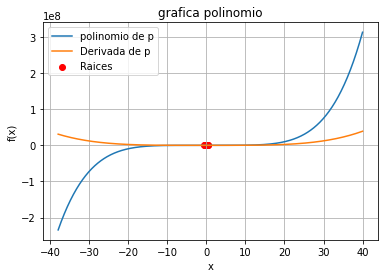

In [99]:
# grafica

import matplotlib.pyplot as plt
import numpy as np
p = np.poly1d([3, 2, 9, 1, 4, 5])
x=np.linspace(-38,40,500)
y=3*x**5 + 2*x**4 + 9*x**3 + 1*x**2 + 5
import matplotlib.pyplot as plt
import numpy as np
d=p.deriv()
d
plt.plot(x,y,label='polinomio de p')
plt.plot(x,d(x),label='Derivada de p')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('grafica polinomio')
plt.scatter(c, p(c), color='r', label='Raices' )
plt.legend()
plt.show
plt.grid()

plt.show()


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


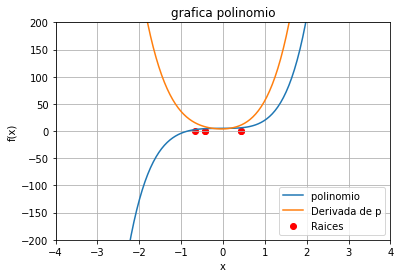

In [120]:

#  usando 
import matplotlib.pyplot as plt
import numpy as np
p = np.poly1d([3, 2, 9, 1, 4, 5])
x=np.linspace(-18,15,500)
y=3*x**5 + 2*x**4 + 9*x**3 + 1*x**2 + 5
import matplotlib.pyplot as plt
import numpy as np
d=p.deriv()
d
plt.plot(x,y,label='polinomio ')
plt.plot(x,d(x),label='Derivada de p')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('grafica polinomio')
plt.scatter(c, p(c), color='r', label='Raices' )
plt.legend()
plt.show
plt.xlim(-4,4)
plt.ylim(-200,200)

plt.grid()

plt.show()

B)

I) Usando como semilla el número de su cédula, genere de forma aletoria un número entero entre 1 y 5

II) De acuerdo al entero obtenido, escoja una de las siguientes cinco funciones 
1. $$x\operatorname{e}^x=p\,, $$
2. $$\frac{\sin x}{x}=+p\,,$$
3. $$\frac{\sin x}{x}=-p\,,$$
4. $$\frac{\cos x}{x}=+p\,,$$
5. $$\frac{\cos x}{x}=-p\,,$$
III) Genere un número aleatorio entre 0 y 1 y asignelo al valor de $p$
IV) Encuentre la solución a la ecuación trascendental para el intervalo $x$ entre -10 y 10 y gráfique la correspondiente función trascendental y las correspondientes soluciones. . Se tendrá en cuenta la estética del gráfico presentado incluyendo la rotulación adecuada del mismo.

A modo de nota curiosa: estas ecuaciones trascendentales están asociadas a soluciones de la ecuación de Schödinger en mecánica cuántica: https://doi.org/10.1080/14786435.2015.1081425

In [132]:

# I
import numpy as np
# generando numero aleatorio con el documento de identidad
np.random.seed(98540850) # realizo el random con el documento cc 98540850 de (1-5)
z = np.random.randint(1,5)
print('numero arrojado:')
print(z)

numero arrojado:
2


De acuerdo al numero aleatorio la ecuacion seleccionada es :

 $$\frac{\sin x}{x}=+p\,,$$

In [146]:
# I
import numpy as np
# generar numero aleatorio entre 0 y 1 
z = np.random.rand()
print('numero arrojado:')
print(z)

numero arrojado:
0.765067999504343


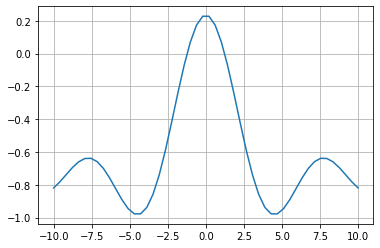

In [148]:
# grafica para saber laposicion de las raices. para mi caso puedo ver dos raices
x = np.linspace(-10,10)
f = (np.sin(x)/x)-z 
plt.plot(x,f)
plt.grid()



In [161]:
# obtengo la primer raiz

from scipy import optimize
def f1(x):
    return (np.sin(x)/x)-z 

v=optimize.fixed_point(lambda x: x-f1(x),1) 
v   

array(1.10831502)

In [164]:
#obtengo la segunda raiz

from scipy import optimize
def f1(x):
    return (np.sin(x)/x)-z 

s=optimize.fixed_point(lambda x: x-f1(x),-1) 
s

array(-1.10831502)